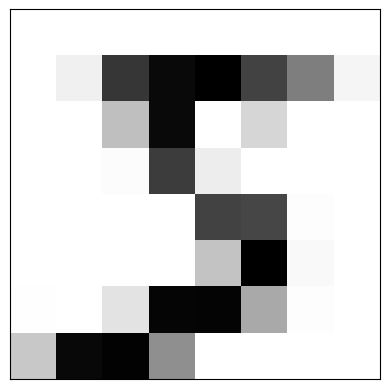

In [1]:
# from class_QAutoencoder import data_zoom, size_final
from class_QAutoencoder import *
import class_QAutoencoder
# class_QAutoencoder.

ax = plt.subplot(1, 1, 1)
plt.imshow(data_zoom.x_train[0].reshape(size_final, size_final), cmap='gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# def model

In [4]:
BIT_WIDTH = 8
# EPOCHS = 80
# Q_EPOCHS = 25
EPOCHS = 1
Q_EPOCHS = 1
BATCH_SIZE = 256
MODEL_NAME = 'model'
MINI_MODEL = True
FIT_MODEL = False
MODEL_SIZE = 0  # 0: short, 1: medium, 2: long, 3: very long
mini = "mini/" if MINI_MODEL else "normal/"

# model_obj = QAutoencoder(data_zoom, bit_width=BIT_WIDTH,
#                          EPOCHS=EPOCHS, Q_EPOCHS=Q_EPOCHS, model_name=MODEL_NAME)

# model_obj.model.summary()

# fit

In [5]:
# if FIT_MODEL:
#     model_obj.fit_data(batch_size=BATCH_SIZE, epochs=EPOCHS)


# Load objects

## load it 

### definitions

In [30]:
# list all folders in the given directory
import os

def get_best_model_path(path):
    if directories := [
    d
    for d in os.listdir(path)
    if d.startswith('model_') and d.endswith('loss')
]:
    # Extract loss value from each directory name
        losses = [float(d.split('_')[1].replace('loss', '')) for d in directories]

    # Select directory with lowest loss value
        lowest_loss_index = losses.index(min(losses))
        lowest_loss_dir = directories[lowest_loss_index]
        print(f"The directory with the lowest loss is {lowest_loss_dir}")
        return f"{path}{lowest_loss_dir}"

    else:
        print("No directories found with name pattern 'model_*loss'")
        return ""

# whole_dir = os.path.abspath(".")
path = f'{whole_dir}/models/{mini}'  # Replace with the path to the directory you want to list    
path

'C:\\Users\\luisa\\OneDrive\\Documentos\\GitHub\\DenseNN_to_VHDL/models/mini/'

In [32]:
best_model_path = get_best_model_path(path)  
print(best_model_path)

The directory with the lowest loss is model_64_0.06574loss
C:\Users\luisa\OneDrive\Documentos\GitHub\DenseNN_to_VHDL/models/mini/model_64_0.06574loss


In [33]:
def load_objects(model_dir: str):
    
    # model_obj.model.save('model_obj_keras_model.h5')
    # Load the TensorFlow model
    loaded_model = tf.keras.models.load_model(f"{model_dir}/KERAS_check_best_model.model")

    # Load the Keras model
    # loaded_keras_model = tf.keras.models.load_model(f'{model_dir}/model_obj_keras_model.h5')

    # Load the .tflite model
    with open(f"{model_dir}/saved_objects/tflite_model.tflite", "rb") as file:
        loaded_tflite_model = file.read()

    # Load other attributes
    with open(f'{model_dir}/saved_objects/model_obj_attributes.pickle', 'rb') as f:
        loaded_attributes = pickle.load(f)
    
    # Create a new QAutoencoder object and set the attributes
    loaded_model_obj = QAutoencoder(data_zoom, bit_width=loaded_attributes['BIT_WIDTH'], model_name=loaded_attributes['model_name'],
                                    EPOCHS=loaded_attributes['EPOCHS'], Q_EPOCHS=loaded_attributes['Q_EPOCHS'])
    
    loaded_model_obj.model = loaded_model
    # loaded_model_obj.model = loaded_keras_model
    loaded_model_obj.quantized_tflite_model = loaded_tflite_model

    loaded_model_obj.x_train = loaded_attributes['x_train']
    # loaded_model_obj.y_train = loaded_attributes['y_train']
    loaded_model_obj.x_test = loaded_attributes['x_test']
    # loaded_model_obj.y_test = loaded_attributes['y_test']
    loaded_model_obj.input_min = loaded_attributes['input_min']
    loaded_model_obj.input_max = loaded_attributes['input_max']
    loaded_model_obj.input_shape = loaded_attributes['input_shape']
    loaded_model_obj.BIT_WIDTH = loaded_attributes['BIT_WIDTH']
    loaded_model_obj.EPOCHS = loaded_attributes['EPOCHS']
    loaded_model_obj.Q_EPOCHS = loaded_attributes['Q_EPOCHS']
    loaded_model_obj.model_name = loaded_attributes['model_name']
    loaded_model_obj.history = loaded_attributes['history']
    loaded_model_obj.loss = loaded_attributes['loss']
    loaded_model_obj.float_model_predictions = loaded_attributes['float_model_predictions']
    loaded_model_obj.path_to_model = loaded_attributes['path_to_model']

    loaded_model_obj.path_to_quantized_model = loaded_attributes['path_to_quantized_model']
    # loaded_model_obj.q_aware_model = loaded_attributes['q_aware_model']
    loaded_model_obj.q_aware_loss = loaded_attributes['q_aware_loss']
    loaded_model_obj.quantized_tflite_model = loaded_attributes['quantized_tflite_model']
    # loaded_model_obj.interpreter = loaded_attributes['interpreter']
    # loaded_model_obj.input_details = loaded_attributes['input_details']
    # loaded_model_obj.output_details = loaded_attributes['output_details']
    loaded_model_obj.quantized_model_predictions = loaded_attributes['quantized_model_predictions']
    
    # loaded_model_obj.interpreter = loaded_tflite_model
    # loaded_model_obj.mse = loaded_attributes['mse']

    # Recreate the TFLite interpreter
    loaded_model_obj.interpreter = tf.lite.Interpreter(model_content=loaded_tflite_model)
    loaded_model_obj.interpreter.allocate_tensors()
    loaded_model_obj.input_details = loaded_model_obj.interpreter.get_input_details()
    loaded_model_obj.output_details = loaded_model_obj.interpreter.get_output_details()
    # loaded_model_obj.convert_to_Q_aware()

    return loaded_model_obj


### loaded model

In [35]:
# Load the objects and create a new model_obj
loaded_model_obj = load_objects(model_dir = best_model_path)

In [36]:
loaded_model_obj.loss

0.06574463844299316

In [38]:
loaded_model_obj.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
Total params: 4,160
Trainable params: 4,160
Non-trainable params: 0
_________________________________________________________________


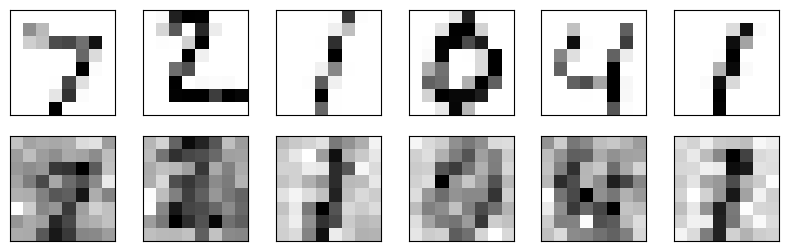

In [39]:
loaded_model_obj.plot_float_model()


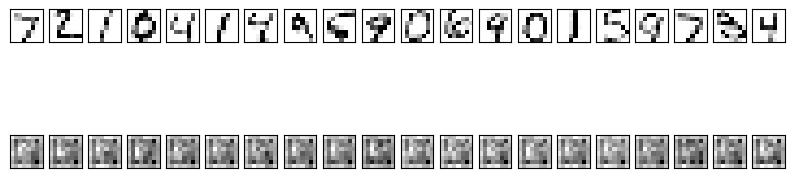

In [40]:
loaded_model_obj.quantized_predictions(n=20)
loaded_model_obj.plot_quantized_model(n=20)

In [41]:
# loaded_model_obj.quantized_predictions2(n=20)
# loaded_model_obj.plot_quantized_model(n=20)

In [44]:
from fxpmath import Fxp

is_signed = True
tb_files_dir = f'{best_model_path}/testbench_files'
if not os.path.exists(tb_files_dir):
    os.makedirs(tb_files_dir)

In [56]:
def tb_inputs_gen(loaded_model_obj: QAutoencoder, tb_files_dir:str):
    quantized_model_predictions = []
    pred_len = len(loaded_model_obj.quantized_model_predictions)

    with open(f'{tb_files_dir}/tb_inputs.txt', 'w') as f:
        for img in range(pred_len):
        # Prepare input data
            input_data = np.array([(loaded_model_obj.x_test[img] - loaded_model_obj.input_min) / (loaded_model_obj.input_max - loaded_model_obj.input_min) * (2 ** (loaded_model_obj.BIT_WIDTH))], dtype=np.int8)

            for pixel in input_data[0]:
                fxp_item = Fxp(pixel, signed=True, n_word=loaded_model_obj.BIT_WIDTH, n_frac=0)
            # print(pixel, " = ", fxp_item, " : ", fxp_item.bin())

                f.write(fxp_item.bin())
            f.write("\n")
            # print(f"input_data: {input_data}")
    print(f"created: {tb_files_dir}/tb_inputs.txt")

tb_inputs_gen(loaded_model_obj, tb_files_dir)



created: C:\Users\luisa\OneDrive\Documentos\GitHub\DenseNN_to_VHDL/models/mini/model_64_0.06574loss/testbench_files/tb_inputs.txt


In [57]:
def expected_results_gen(loaded_model_obj: QAutoencoder, tb_files_dir: str): 
    #  generating expected results for testbench: BINARY!
    with open(f'{tb_files_dir}/expected_results_bin.txt', 'w') as f:
        for img in loaded_model_obj.quantized_model_predictions:
            for row in img:
                for pixel in row:
                    # print(pixel, " : ", Fxp(pixel, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
                    f.write(Fxp(pixel, signed=is_signed,
                            n_word=loaded_model_obj.BIT_WIDTH, n_frac=0).bin())
            # print(" ")
            f.write('\n')
    print(f"created: {tb_files_dir}/expected_results_bin.txt")

    #  generating expected results for testbench: DECIMAL!
    with open(f'{tb_files_dir}/expected_results_dec.txt', 'w') as f:
        for img in loaded_model_obj.quantized_model_predictions:
            for row in img:
                for pixel in row:
                # print(pixel, " : ", Fxp(pixel, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
                    f.write(f"{str(pixel)} ")

        # print(" ")
            f.write('\n')
    print(f"created: {tb_files_dir}/expected_results_dec.txt")

expected_results_gen(loaded_model_obj, tb_files_dir)

created: C:\Users\luisa\OneDrive\Documentos\GitHub\DenseNN_to_VHDL/models/mini/model_64_0.06574loss/testbench_files/expected_results_bin.txt
created: C:\Users\luisa\OneDrive\Documentos\GitHub\DenseNN_to_VHDL/models/mini/model_64_0.06574loss/testbench_files/expected_results_dec.txt


In [49]:
# loaded_model_obj.model.get_weights()

In [50]:
# loaded_model_obj.quantized_tflite_model